# Preparation


## Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Import Data



In [ ]:
# Memuat dataset
url = "https://data.wa.gov/api/views/dn4d-x42e/rows.csv?accessType=DOWNLOAD" 
dataset = pd.read_csv(url)
dataset

,Station,Station Name,Year,Overall WQI,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb,Location 1
0,16A070,Skokomish R nr Potlatch,1996.0,87,91,85,95,78,81,99,84,69,POINT (-123.1771 47.3098)
1,16A070,Skokomish R nr Potlatch,1997.0,86,78,84,77,85,90,99,72,80,POINT (-123.1771 47.3098)
2,16A070,Skokomish R nr Potlatch,1998.0,75,90,79,88,61,90,98,71,49,POINT (-123.1771 47.3098)
3,16A070,Skokomish R nr Potlatch,1999.0,87,88,80,88,75,95,100,79,71,POINT (-123.1771 47.3098)
4,16A070,Skokomish R nr Potlatch,2000.0,95,93,86,96,84,90,100,84,87,POINT (-123.1771 47.3098)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,23A070,Chehalis R @ Porter,2013.0,62,85,89,92,68,68,52,58,75,POINT (-123.3138 46.9393)
967,23A160,Chehalis R @ Dryad,2013.0,65,76,78,96,78,65,77,73,81,POINT (-123.2501 46.6309)
968,24B090,Willapa R nr Willapa,2013.0,80,78,87,91,78,78,57,69,82,POINT (-123.6535 46.6501)
969,24F070,Naselle R nr Naselle,2013.0,79,67,88,94,87,77,67,88,93,POINT (-123.7468 46.3729)


## Mengambil Kolom Yang dibutuhkan

In [ ]:
dataset = dataset.drop(columns=['Station', 'Station Name', 'Year', 'Location 1'])
dataset

,Overall WQI,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb
0,87,91,85,95,78,81,99,84,69
1,86,78,84,77,85,90,99,72,80
2,75,90,79,88,61,90,98,71,49
3,87,88,80,88,75,95,100,79,71
4,95,93,86,96,84,90,100,84,87
...,...,...,...,...,...,...,...,...,...
966,62,85,89,92,68,68,52,58,75
967,65,76,78,96,78,65,77,73,81
968,80,78,87,91,78,78,57,69,82
969,79,67,88,94,87,77,67,88,93


## Mengganti nama kolom

In [ ]:
dataset = dataset.rename(columns={
    'Overall WQI' : 'label'})
dataset

,label,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb
0,87,91,85,95,78,81,99,84,69
1,86,78,84,77,85,90,99,72,80
2,75,90,79,88,61,90,98,71,49
3,87,88,80,88,75,95,100,79,71
4,95,93,86,96,84,90,100,84,87
...,...,...,...,...,...,...,...,...,...
966,62,85,89,92,68,68,52,58,75
967,65,76,78,96,78,65,77,73,81
968,80,78,87,91,78,78,57,69,82
969,79,67,88,94,87,77,67,88,93


## Menganti Value Label (Overall WQI)

Sesuai dengan NFS WQI, sebagai berikut :

91 - 100 Exellent,

71 - 90  Good

51 - 70  Medium

26 - 50  Bad

0  - 25  Very Bad

In [ ]:
Rentang = [
    (dataset.label >= 91) & (dataset.label <= 100),
    (dataset.label >= 71) & (dataset.label <= 90),
    (dataset.label >= 51) & (dataset.label <= 70),
    (dataset.label >= 26) & (dataset.label <= 50),
    (dataset.label >= 0)  & (dataset.label <= 25),
]

indeks = [4, 3, 2, 1, 0]

dataset['label'] = np.select(Rentang, indeks)
dataset

,label,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb
0,3,91,85,95,78,81,99,84,69
1,3,78,84,77,85,90,99,72,80
2,3,90,79,88,61,90,98,71,49
3,3,88,80,88,75,95,100,79,71
4,4,93,86,96,84,90,100,84,87
...,...,...,...,...,...,...,...,...,...
966,2,85,89,92,68,68,52,58,75
967,2,76,78,96,78,65,77,73,81
968,3,78,87,91,78,78,57,69,82
969,3,67,88,94,87,77,67,88,93


## Membuat dataset baru

In [ ]:
# Mengunduh kolom tertentu ke dalam file CSV
kolom_yang_diunduh = ['WQI FC', 'WQI Oxy', 'WQI pH','WQI TSS','WQI Temp','WQI TPN','WQI TP','WQI Turb']  
dataset[kolom_yang_diunduh].to_csv("kolomFitur_dataset.csv", index=False)
data = "/content/kolomFitur_dataset.csv"
data = pd.read_csv(data)
data.head ()

,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb
0,91,85,95,78,81,99,84,69
1,78,84,77,85,90,99,72,80
2,90,79,88,61,90,98,71,49
3,88,80,88,75,95,100,79,71
4,93,86,96,84,90,100,84,87


In [ ]:
# Mengunduh kolom tertentu ke dalam file CSV
kolom_yang_diunduh1 = ['label']  
dataset[kolom_yang_diunduh1].to_csv("kolomTarget_dataset.csv", index=False)
data2 = "/content/kolomTarget_dataset.csv"
data2 = pd.read_csv(data2)
data2.head ()

,label
0,3
1,3
2,3
3,3
4,4


In [ ]:
# Menyatukan data
data1 = pd.concat([data, data2], axis=1)
data1

,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb,label
0,91,85,95,78,81,99,84,69,3
1,78,84,77,85,90,99,72,80,3
2,90,79,88,61,90,98,71,49,3
3,88,80,88,75,95,100,79,71,3
4,93,86,96,84,90,100,84,87,4
...,...,...,...,...,...,...,...,...,...
966,85,89,92,68,68,52,58,75,2
967,76,78,96,78,65,77,73,81,2
968,78,87,91,78,78,57,69,82,3
969,67,88,94,87,77,67,88,93,3


## Info Dataset

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   WQI FC    971 non-null    int64
 1   WQI Oxy   971 non-null    int64
 2   WQI pH    971 non-null    int64
 3   WQI TSS   971 non-null    int64
 4   WQI Temp  971 non-null    int64
 5   WQI TPN   971 non-null    int64
 6   WQI TP    971 non-null    int64
 7   WQI Turb  971 non-null    int64
 8   label     971 non-null    int64
dtypes: int64(9)
memory usage: 68.4 KB


## Melihat Missing 

In [ ]:
# dalam dataset ini terdapat value kosong seperti "---", maka terlebih dahulu kita tanti dengan null
data1 = data1.replace('---', np.nan)
data1 = data1.replace('nan', np.nan)
data1 = data1.replace('TIDAK ADA DATA', np.nan)

data1.isnull().sum()

WQI FC      0
WQI Oxy     0
WQI pH      0
WQI TSS     0
WQI Temp    0
WQI TPN     0
WQI TP      0
WQI Turb    0
label       0
dtype: int64

## Melihat Outlier 


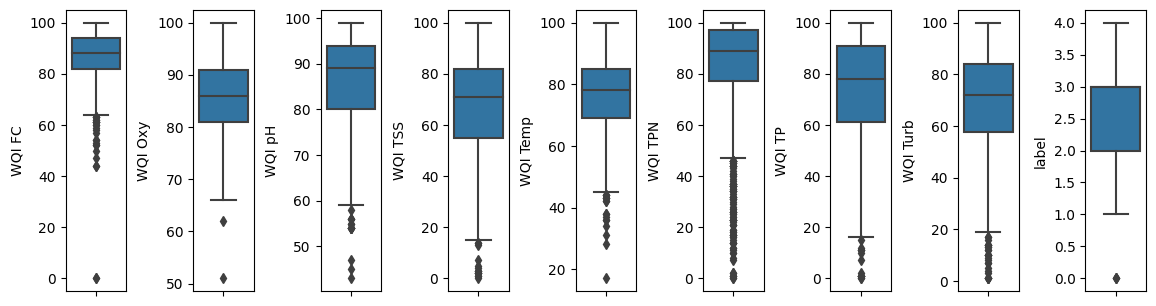

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 9, figsize=(11.5, 3))
count = 0
axes = axes.flatten()

for i, value in data1.items():
    sns.boxplot(ax=axes[count], y=i, data=data1)
    count += 1

plt.tight_layout(pad=0.5, h_pad=3, w_pad=0.8)

In [ ]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
data1= data1[~((data1 < (Q1 - 1.5*IQR)) | (data1 > (Q3 + 1.5*IQR))).any(axis=1)]
data1.shape

(808, 9)

In [ ]:
data1

,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb,label
0,91,85,95,78,81,99,84,69,3
1,78,84,77,85,90,99,72,80,3
2,90,79,88,61,90,98,71,49,3
3,88,80,88,75,95,100,79,71,3
4,93,86,96,84,90,100,84,87,4
...,...,...,...,...,...,...,...,...,...
966,85,89,92,68,68,52,58,75,2
967,76,78,96,78,65,77,73,81,2
968,78,87,91,78,78,57,69,82,3
969,67,88,94,87,77,67,88,93,3


## Standarisasi Feature

In [ ]:
features = data1.drop(['label'], axis=1) # dropping target
min_max_scaler = MinMaxScaler()
df_transformed = data1.copy()
for feature in features:
    df_transformed[[feature]] = min_max_scaler.fit_transform(data1[[feature]])

df_transformed

,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb,label
0,0.750000,0.558824,0.900,0.731707,0.654545,0.981132,0.809524,0.617284,3
1,0.388889,0.529412,0.450,0.817073,0.818182,0.981132,0.666667,0.753086,3
2,0.722222,0.382353,0.725,0.524390,0.818182,0.962264,0.654762,0.370370,3
3,0.666667,0.411765,0.725,0.695122,0.909091,1.000000,0.750000,0.641975,3
4,0.805556,0.588235,0.925,0.804878,0.818182,1.000000,0.809524,0.839506,4
...,...,...,...,...,...,...,...,...,...
966,0.583333,0.676471,0.825,0.609756,0.418182,0.094340,0.500000,0.691358,2
967,0.333333,0.352941,0.925,0.731707,0.363636,0.566038,0.678571,0.765432,2
968,0.388889,0.617647,0.800,0.731707,0.600000,0.188679,0.630952,0.777778,3
969,0.083333,0.647059,0.875,0.841463,0.581818,0.377358,0.857143,0.913580,3


In [ ]:
data1 = df_transformed

# Build Model

## Encoding

In [ ]:
encoder = LabelEncoder()

In [ ]:
X = data1.iloc[:,:-1]
y = data1.iloc[:,-1:]
y

,label
0,3
1,3
2,3
3,3
4,4
...,...
966,2
967,2
968,3
969,3


In [ ]:
encoder.fit(y)
y = encoder.transform(y)
y = tf.keras.utils.to_categorical(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

## Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [ ]:
X_train.shape

(646, 8)

In [ ]:
X_test.shape

(162, 8)

## Model Sequential

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_dim = 8 ,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(16,activation = "relu"),
    tf.keras.layers.Dense(8,activation = "relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation = "softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               2304      
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                

## Model Compile

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = "accuracy")

In [ ]:
history = model.fit(X_train,y_train,validation_data = (X_test, y_test),epochs = 200,batch_size = 4,verbose = 2)

Epoch 1/200
162/162 - 3s - loss: 1.0832 - accuracy: 0.5759 - val_loss: 0.8526 - val_accuracy: 0.6975 - 3s/epoch - 17ms/step
Epoch 2/200
162/162 - 1s - loss: 0.9151 - accuracy: 0.6238 - val_loss: 0.7126 - val_accuracy: 0.7407 - 780ms/epoch - 5ms/step
Epoch 3/200
162/162 - 1s - loss: 0.7677 - accuracy: 0.7229 - val_loss: 0.6221 - val_accuracy: 0.7593 - 556ms/epoch - 3ms/step
Epoch 4/200
162/162 - 0s - loss: 0.7225 - accuracy: 0.7291 - val_loss: 0.5433 - val_accuracy: 0.7778 - 469ms/epoch - 3ms/step
Epoch 5/200
162/162 - 1s - loss: 0.6228 - accuracy: 0.7678 - val_loss: 0.4646 - val_accuracy: 0.8210 - 546ms/epoch - 3ms/step
Epoch 6/200
162/162 - 0s - loss: 0.6290 - accuracy: 0.7616 - val_loss: 0.5467 - val_accuracy: 0.7778 - 438ms/epoch - 3ms/step
Epoch 7/200
162/162 - 0s - loss: 0.5930 - accuracy: 0.7632 - val_loss: 0.5426 - val_accuracy: 0.7531 - 433ms/epoch - 3ms/step
Epoch 8/200
162/162 - 0s - loss: 0.5534 - accuracy: 0.7802 - val_loss: 0.4050 - val_accuracy: 0.7840 - 434ms/epoch - 3ms

## Performance Model


In [ ]:
# Melihat akurasi dari riwayat pelatihan
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
print(f'Maximum Training Accuracy: {max(train_accuracy)}')
print(f'Maximum  Validation Accuracy: {max(val_accuracy)}\n')
print(f'Minimum Training Loss: {min(train_loss)}')
print(f'Minimum Validation Loss: {min(val_loss)}')

Maximum Training Accuracy: 0.9365324974060059
Maximum  Validation Accuracy: 0.8765432238578796

Minimum Training Loss: 0.14051467180252075
Minimum Validation Loss: 0.3466343283653259


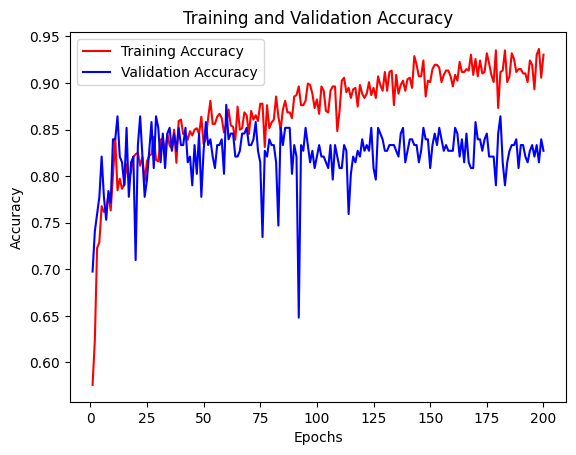

In [ ]:
# Melihat grafik akurasi pelatihan dan validasi
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
lossTest, accTest = model.evaluate(X_test, y_test, batch_size=4)
print(f'\nLoss Test: {lossTest}')
print(f'Accuracy Test: {accTest*100}')

41/41 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.8272

Loss Test: 0.6703333258628845
Accuracy Test: 82.71604776382446


# Deployment

## H5

In [ ]:
model.save("/content/Water.h5")

### Predict

In [ ]:
data_dummy = np.array([[91,85,95,78,81,99,84,69	]])# good
np.argmax(model.predict(data_dummy))

1/1 [==============================] - 0s 87ms/step


3

In [ ]:
def Pred(data):
  pred = np.argmax(model.predict(data))

  if pred == 0:
    label  = "Very Bad"
  elif pred == 1:
    label  = "Bad"
  elif pred == 2:
    label  = "Medium"
  elif pred == 3:
    label  = "Good"
  elif pred == 4:
    label  = "Exellent"

  
  return label

In [ ]:
Pred(data_dummy)

1/1 [==============================] - 0s 22ms/step


'Good'

## Tensorflowlite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'water.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

###Predict test

In [ ]:
with open("water.tflite", 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_data = np.array([[78.0,80.0,88.0,53.0,90.0,56.0,82.0,99.0]])  # Include values for all 8 input features


In [ ]:
#classification function
def classify_water_tflite(model_path, data): #model_path:lokasi tflitenya, data = array isinya variabelnya
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    #convert data type to float32
    data = data.astype(np.float32)

    # Set the input tensor data
    interpreter.set_tensor(input_details[0]['index'], data)

    # Run inference
    interpreter.invoke()

    # Get the output tensor data
    predictions = interpreter.get_tensor(output_details[0]['index'])

    # Convert predictions to class labels
    predicted_classes = np.argmax(predictions, axis=1)

    return predicted_classes

In [ ]:
model_path = '/content/water.tflite'
input_data = np.array([[25,25,25,25,25,25,25,25]])
input_data = input_data.astype(np.float32)
predicted_classes = classify_water_tflite(model_path, input_data)

print(predicted_classes)

[3]


In [ ]:
from google.colab import files
files.download("water.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>